In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

 Task 1

In [54]:
df = pd.read_csv("Data_set 2 - Copy.csv")

In [55]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [56]:
df.shape


(40, 24)

In [57]:
df.columns.tolist()

['gender',
 'age',
 'Investment_Avenues',
 'Mutual_Funds',
 'Equity_Market',
 'Debentures',
 'Government_Bonds',
 'Fixed_Deposits',
 'PPF',
 'Gold',
 'Stock_Marktet',
 'Factor',
 'Objective',
 'Purpose',
 'Duration',
 'Invest_Monitor',
 'Expect',
 'Avenue',
 'What are your savings objectives?',
 'Reason_Equity',
 'Reason_Mutual',
 'Reason_Bonds',
 'Reason_FD',
 'Source']

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [59]:
df.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


In [60]:
df.isnull()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df.sum().isnull()

gender                               False
age                                  False
Investment_Avenues                   False
Mutual_Funds                         False
Equity_Market                        False
Debentures                           False
Government_Bonds                     False
Fixed_Deposits                       False
PPF                                  False
Gold                                 False
Stock_Marktet                        False
Factor                               False
Objective                            False
Purpose                              False
Duration                             False
Invest_Monitor                       False
Expect                               False
Avenue                               False
What are your savings objectives?    False
Reason_Equity                        False
Reason_Mutual                        False
Reason_Bonds                         False
Reason_FD                            False
Source     

Task 2

In [62]:
gender_counts = df['gender'].value_counts()

In [63]:
gender_counts

gender
Male      25
Female    15
Name: count, dtype: int64

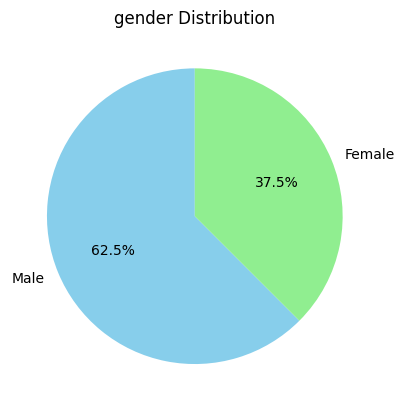

In [64]:
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('gender Distribution')
plt.ylabel('')
plt.show()

Task 3

In [65]:
numeric_cols = df.select_dtypes(include='number')


In [66]:
numeric_cols

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
0,34,1,2,5,3,7,6,4
1,23,4,3,2,1,5,6,7
2,30,3,6,4,2,5,1,7
3,22,2,1,3,7,6,4,5
4,24,2,1,3,6,4,5,7
5,24,7,5,4,6,3,1,2
6,27,3,6,4,2,5,1,7
7,21,2,3,7,4,6,1,5
8,35,2,4,7,5,3,1,6
9,31,1,3,7,4,5,2,6


In [67]:
stats = numeric_cols.describe().T[['mean', '50%', 'std']]
stats.rename(columns={'50%': 'median'}, inplace=True)
print(stats)

                    mean  median       std
age               27.800    27.0  3.560467
Mutual_Funds       2.550     2.0  1.197219
Equity_Market      3.475     4.0  1.131994
Debentures         5.750     6.5  1.675617
Government_Bonds   4.650     5.0  1.369072
Fixed_Deposits     3.575     3.5  1.795828
PPF                2.025     1.0  1.609069
Gold               5.975     6.0  1.143263


 Task 4

In [68]:
investment_mode = df['Investment_Avenues'].value_counts()
investment_mode

Investment_Avenues
Yes    37
No      3
Name: count, dtype: int64

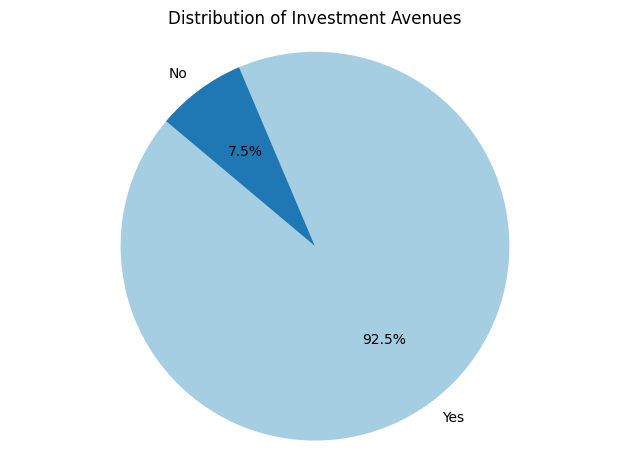

In [89]:
plt.pie(investment_mode, labels=investment_mode.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)


plt.title("Distribution of Investment Avenues")
plt.axis('equal') 
plt.tight_layout()

plt.show()

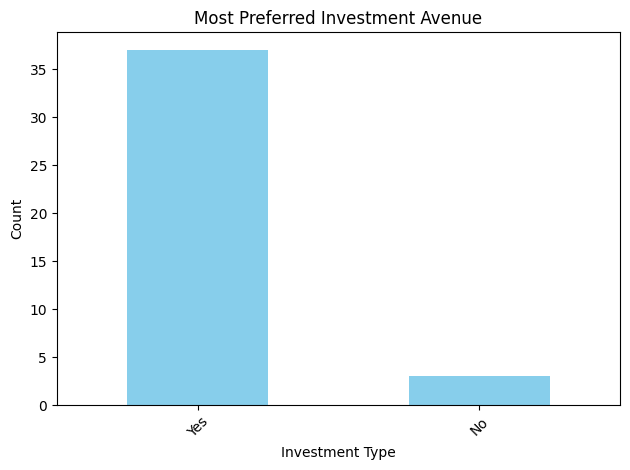

In [69]:
investment_mode.plot(kind='bar', color='skyblue')
plt.title('Most Preferred Investment Avenue')
plt.xlabel('Investment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

task 5

In [70]:
reasons_e = df["Reason_Equity"].value_counts()
reasons_e

Reason_Equity
Capital Appreciation    30
Dividend                 8
Liquidity                2
Name: count, dtype: int64

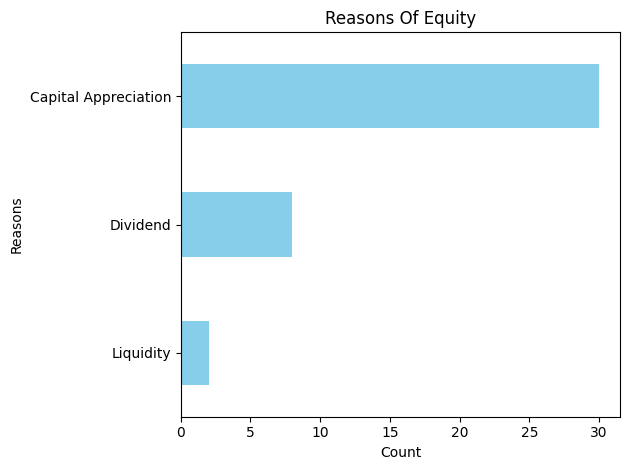

In [71]:
reasons_e.plot(kind='barh', color='skyblue')
plt.title('Reasons Of Equity')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [72]:
reasons_m = df["Reason_Mutual"].value_counts()
reasons_m

Reason_Mutual
Better Returns          24
Fund Diversification    13
Tax Benefits             3
Name: count, dtype: int64

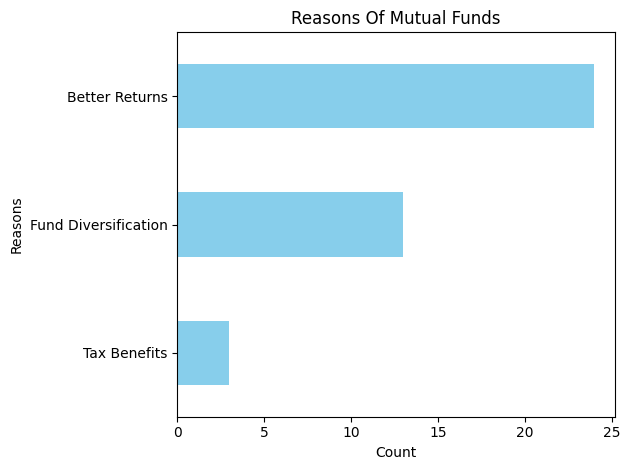

In [73]:
reasons_m.plot(kind='barh', color='skyblue')
plt.title('Reasons Of Mutual Funds')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [74]:
reasons_b = df["Reason_Bonds"].value_counts()
reasons_b

Reason_Bonds
Assured Returns    26
Safe Investment    13
Tax Incentives      1
Name: count, dtype: int64

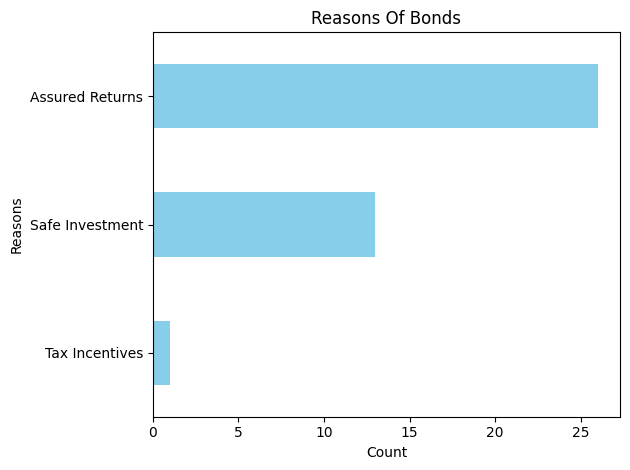

In [75]:
reasons_b.plot(kind='barh', color='skyblue')
plt.title('Reasons Of Bonds')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [76]:
reasons_f = df["Reason_FD"].value_counts()
reasons_f

Reason_FD
Risk Free              19
Fixed Returns          18
High Interest Rates     3
Name: count, dtype: int64

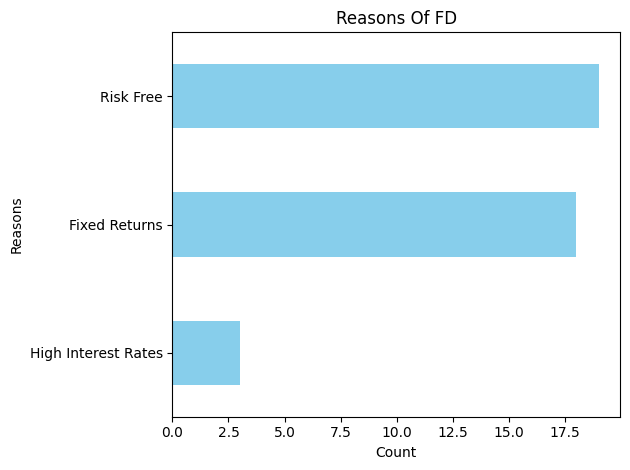

In [77]:
reasons_f.plot(kind='barh', color='skyblue')
plt.title('Reasons Of FD')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Task 6

In [78]:
objective = df['What are your savings objectives?'].value_counts()
objective


What are your savings objectives?
Retirement Plan    24
Health Care        13
Education           3
Name: count, dtype: int64

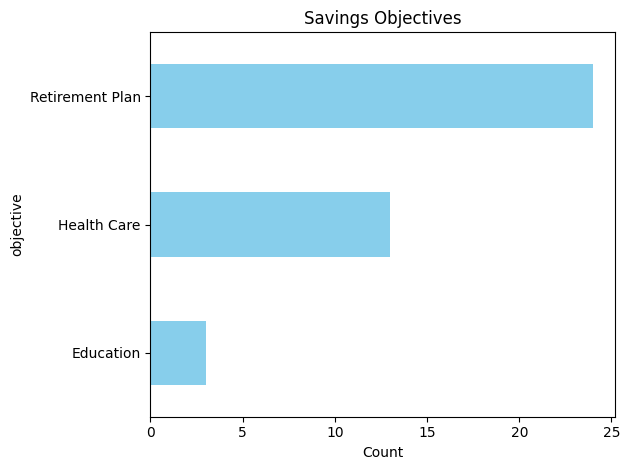

In [79]:
objective.plot(kind='barh', color='skyblue')
plt.title('Savings Objectives')
plt.xlabel('Count')
plt.ylabel('objective')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Task 7

In [80]:
sources = df['Source'].value_counts()

C:\Users\Asus\AppData\Local\Temp\ipykernel_256\1445854659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sources.values, y=sources.index, palette='viridis')


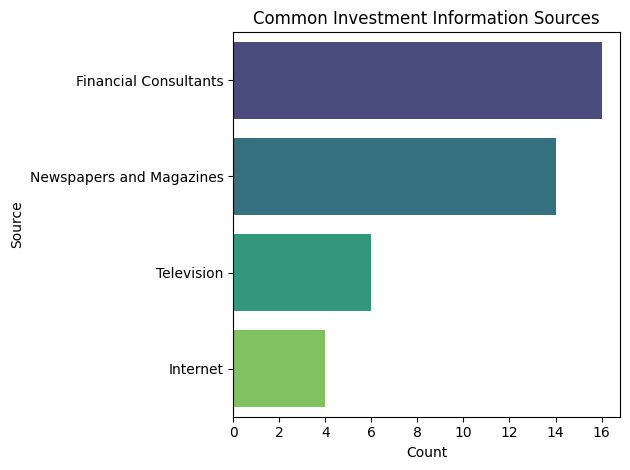

In [81]:
sns.barplot(x=sources.values, y=sources.index, palette='viridis')
plt.title('Common Investment Information Sources')
plt.xlabel('Count')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

Task 8

In [82]:
duration_map = {
    'Less than 1 year': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    'More than 5 years': 6
}

df['Duration_numeric'] = df['Duration'].map(duration_map)

df_cleaned = df.dropna(subset=['Duration_numeric'])

average_duration = df_cleaned['Duration_numeric'].mean()

print(f"📊 Average Investment Duration: {round(average_duration, 2)} years")


📊 Average Investment Duration: 2.98 years


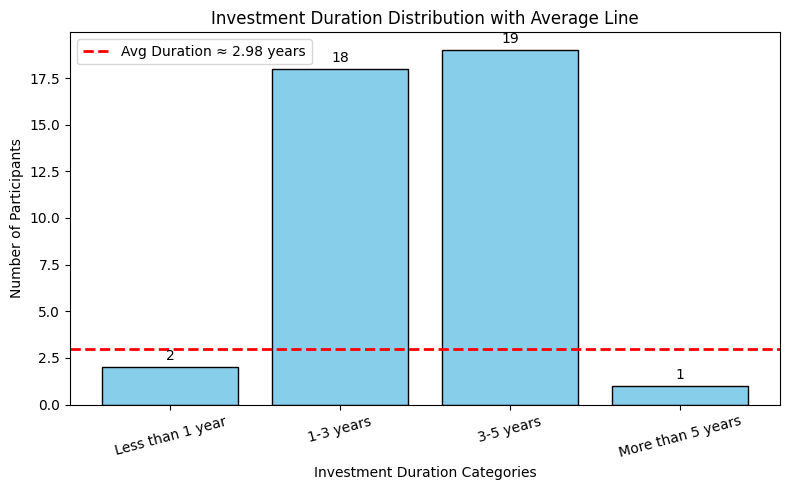

In [83]:

duration_order = ['Less than 1 year', '1-3 years', '3-5 years', 'More than 5 years']
duration_counts = df_cleaned['Duration'].value_counts().reindex(duration_order)

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(duration_order, duration_counts, color='skyblue', edgecolor='black')

ax.axhline(y=average_duration, color='red', linestyle='--', linewidth=2, label=f'Avg Duration ≈ {average_duration:.2f} years')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.2, f'{int(height)}', ha='center', va='bottom')

ax.set_title("Investment Duration Distribution with Average Line")
ax.set_xlabel("Investment Duration Categories")
ax.set_ylabel("Number of Participants")
plt.xticks(rotation=15)
plt.legend()
plt.tight_layout()

plt.show()

Task 9

In [84]:
expectations = df['Expect'].dropna().value_counts()
print("Participants' Common Investment Expectations:\n")
print(expectations.head(10))


Participants' Common Investment Expectations:

Expect
20%-30%    32
30%-40%     5
10%-20%     3
Name: count, dtype: int64


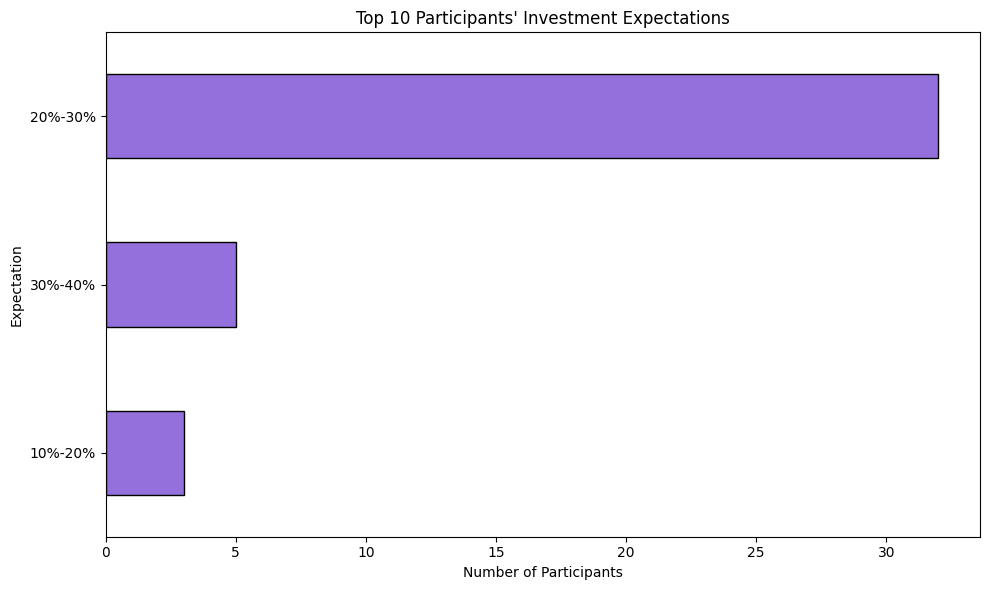

In [85]:
plt.figure(figsize=(10, 6))
expectations.plot(kind='barh', color='mediumpurple', edgecolor='black')
plt.gca().invert_yaxis()  

plt.title("Top 10 Participants' Investment Expectations")
plt.xlabel("Number of Participants")
plt.ylabel("Expectation")
plt.tight_layout()

plt.show()

Task 10

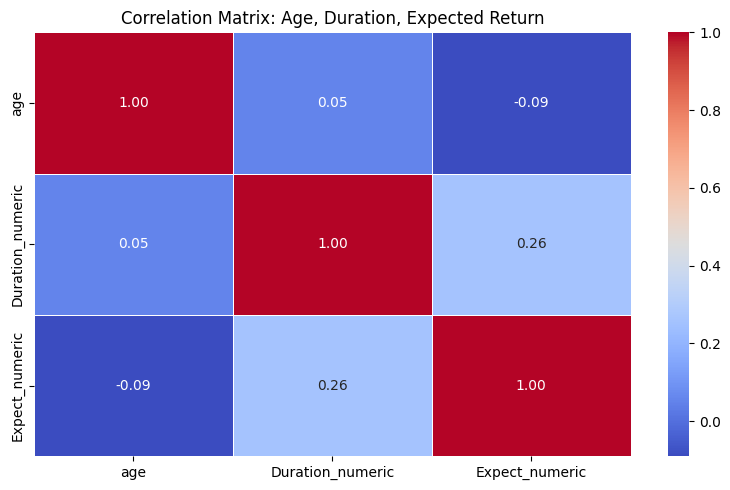

In [86]:
def extract_expectation(expect_str):
    try:
        numbers = [int(n) for n in re.findall(r'\d+', expect_str)]
        return sum(numbers) / len(numbers) if numbers else None
    except:
        return None

df['Expect_numeric'] = df['Expect'].apply(extract_expectation)

df_corr = df[['age', 'Duration_numeric', 'Expect_numeric']].dropna()

correlation = df_corr.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix: Age, Duration, Expected Return")
plt.tight_layout()
plt.show()